In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Load Data

In [2]:
import boto3
from io import BytesIO
from fastparquet import ParquetFile

s3 = boto3.client("s3")
response = s3.list_objects_v2(Bucket='covid-19-prj', Prefix ='raw/fiocruz_infogripe/')
all_objects = [item.get('Key') for item in response.get('Contents')][1:]

def read_parquet_from_s3(keyName):
    obj = s3.get_object(Bucket='covid-19-prj', Key=keyName)
    df = obj['Body'].read()
    return ParquetFile(BytesIO(df)).to_pandas()

dataframes = [read_parquet_from_s3(key_name) for key_name in all_objects]
df = pd.concat(dataframes, axis=0)

## Overview

In [3]:
df.head()

,data de publicação,UF,Unidade da Federação,Tipo,dado,escala,sexo,Ano epidemiológico,Semana epidemiológica,Ano e semana epidemiológica,...,Casos sem informação laboratorial,Casos sem teste laboratorial,Influenza A,Influenza B,SARS-CoV-2,Vírus sincicial respiratório (VSR),Parainfluenza 1,Parainfluenza 2,Parainfluenza 3,Adenovirus
index,,,,,,,,,,,,,,,,,,,,,
0,2020-05-04,11,Rondônia,Estado,srag,incidência,F,2009,1,2009W01,...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0"
1,2020-05-04,11,Rondônia,Estado,srag,incidência,M,2009,1,2009W01,...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0"
2,2020-05-04,11,Rondônia,Estado,srag,incidência,Total,2009,1,2009W01,...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0"
3,2020-05-04,11,Rondônia,Estado,srag,incidência,F,2009,2,2009W02,...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0"
4,2020-05-04,11,Rondônia,Estado,srag,incidência,M,2009,2,2009W02,...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0"


In [9]:
df.columns

Index(['data de publicação', 'UF', 'Unidade da Federação', 'Tipo', 'dado',
       'escala', 'sexo', 'Ano epidemiológico', 'Semana epidemiológica',
       'Ano e semana epidemiológica', 'Situação do dado',
       'Total reportado até a última atualização', 'Idade desconhecida',
       '< 2 anos', '0-4 anos', '10-19 anos', '2-4 anos', '20-29 anos',
       '30-39 anos', '40-49 anos', '5-9 anos', '50-59 anos', '60+ anos',
       'Testes positivos', 'Testes negativos', 'Casos aguardando resultado',
       'Casos sem informação laboratorial', 'Casos sem teste laboratorial',
       'Influenza A', 'Influenza B', 'SARS-CoV-2',
       'Vírus sincicial respiratório (VSR)', 'Parainfluenza 1',
       'Parainfluenza 2', 'Parainfluenza 3', 'Adenovirus'],
      dtype='object')

In [5]:
#df.describe()

In [6]:
df.dtypes

data de publicação                          object
UF                                           int64
Unidade da Federação                        object
Tipo                                        object
dado                                        object
escala                                      object
sexo                                        object
Ano epidemiológico                           int64
Semana epidemiológica                        int64
Ano e semana epidemiológica                 object
Situação do dado                            object
Total reportado até a última atualização    object
Idade desconhecida                          object
< 2 anos                                    object
0-4 anos                                    object
10-19 anos                                  object
2-4 anos                                    object
20-29 anos                                  object
30-39 anos                                  object
40-49 anos                     

In [7]:
# Take a look at the date type
#np.array([isinstance(x, str) for x in df.date]).all()

## EDA

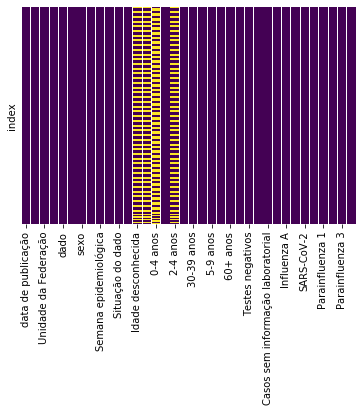

In [8]:
# Missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [14]:
covid_df = df.loc[df.dado.isin(['sragcovid'])]
covid_df['Total reportado até a última atualização'] = covid_df['Total reportado até a última atualização'].apply(lambda row: row.replace(',', '.'))
covid_df['Total reportado até a última atualização'] = covid_df['Total reportado até a última atualização'].astype('float64')
y = covid_df.groupby('Ano e semana epidemiológica').agg({'Total reportado até a última atualização': 'sum'})

/home/ubuntu/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ubuntu/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
y.head()

,Total reportado até a última atualização
Ano e semana epidemiológica,
2020W01,0.0
2020W02,0.0
2020W03,0.0
2020W04,0.0
2020W05,0.0


In [16]:
y['Total reportado até a última atualização'].sum()

108002.29061892064